In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Reading and uploading the file
df = pd.read_csv('voice.csv')
df.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


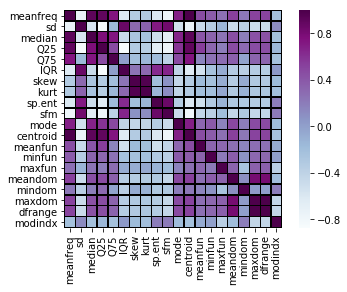

In [8]:
corrmat=df.corr()
sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black')

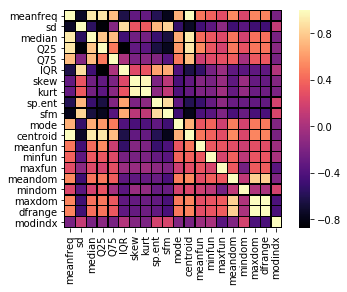

In [9]:
corrmat=df.corr()
sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="magma", linecolor='black')

In [13]:
# Name of the columns
col_names = list(df.columns.values)
print(col_names)
print (type(df.columns.values))

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']
<class 'numpy.ndarray'>


In [14]:
df = df.rename(columns={'label': 'gender'})
df.columns.values

array(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'gender'],
      dtype=object)

In [27]:
#Lets use logistic Regression:
#holdout
#80-20 ratio

#Producing X and y
X = np.array(df.drop(['gender'], 1))
y = np.array(df['gender'])

from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
y = labelencoder1.fit_transform(y)

#Dividing the data randomly into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=LogisticRegression()
model.fit(X_train,y_train)

print('Train accuracy :',model.score(X_train,y_train))
print('Test accuracy :',model.score(X_test,y_test))

Train accuracy : 0.9112075769534334
Test accuracy : 0.8974763406940063


In [28]:
y_score = model.fit(X_train, y_train).decision_function(X_test)
y_pred=model.predict(X_test)

[[262  58]
 [  7 307]]
0.10252365930599369


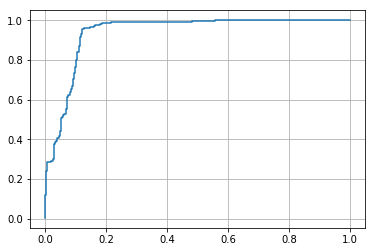

0.9389331210191083


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)

# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print(mcr)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.grid()
plt.show()
print(roc_auc)

Train accuracy : 0.9084348218313035
Test accuracy : 0.8958990536277602
[[392  74]
 [ 25 460]]
0.10410094637223975


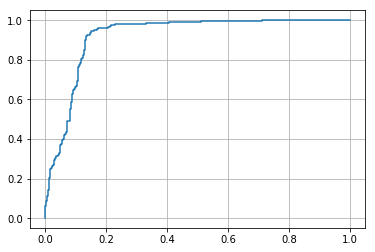

0.921379584974116


In [30]:
#Lets use logistic Regression:
#70-30 ratio
#holdout

#Producing X and y
X = np.array(df.drop(['gender'], 1))
y = np.array(df['gender'])

from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
y = labelencoder1.fit_transform(y)

#Dividing the data randomly into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

model=LogisticRegression()
model.fit(X_train,y_train)

print('Train accuracy :',model.score(X_train,y_train))
print('Test accuracy :',model.score(X_test,y_test))

y_score = model.fit(X_train, y_train).decision_function(X_test)
y_pred=model.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)

# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print(mcr)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.grid()
plt.show()
print(roc_auc)

Train accuracy : 0.9119968429360694
Test accuracy : 0.9148264984227129
[[275  42]
 [ 12 305]]
0.08517350157728706


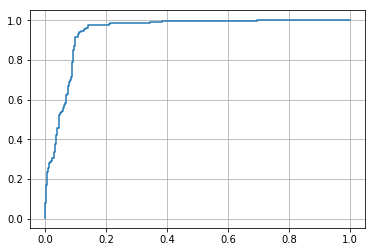

0.942859417448676


In [31]:
#Lets use logistic Regression:
#stratified holdout method
#80-20 rario

#Producing X and y
X = np.array(df.drop(['gender'], 1))
y = np.array(df['gender'])

from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
y = labelencoder1.fit_transform(y)

#Dividing the data randomly into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

model=LogisticRegression()
model.fit(X_train,y_train)

print('Train accuracy :',model.score(X_train,y_train))
print('Test accuracy :',model.score(X_test,y_test))

y_score = model.fit(X_train, y_train).decision_function(X_test)
y_pred=model.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)

# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print(mcr)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.grid()
plt.show()
print(roc_auc)

Train accuracy : 0.9053030303030303
Test accuracy : 0.9128787878787878
[[334  62]
 [  7 389]]
0.08712121212121213


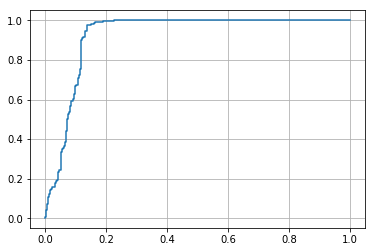

0.9243189470462198


In [45]:
#Lets use logistic Regression:
#k fold cross validation
#80-20 ratio 

#Producing X and y
X = df.drop(['gender'], 1)
y = df['gender']

from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
y = labelencoder1.fit_transform(y)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

model=LogisticRegression()
model.fit(X_train,y_train)


print('Train accuracy :',model.score(X_train,y_train))
print('Test accuracy :',model.score(X_test,y_test))

y_score = model.fit(X_train, y_train).decision_function(X_test)
y_pred=model.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)

# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print(mcr)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.grid()
plt.show()
print(roc_auc)

Train accuracy : 0.9123914759273876
Test accuracy : 0.9305993690851735
[[268  33]
 [ 11 322]]
0.0694006309148265


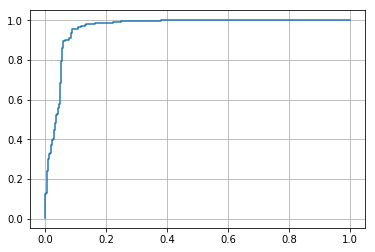

0.9607115421068909


In [54]:
#Lets use logistic Regression:
#bootstrapping

#Producing X and y
X = df.drop(['gender'], 1)
y = df['gender']

from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
y = labelencoder1.fit_transform(y)

from sklearn.cross_validation import ShuffleSplit
rs =ShuffleSplit(n=3168,n_iter=30,train_size=.8,test_size=.2, random_state=0)

for train_index, test_index in rs:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

model=LogisticRegression()
model.fit(X_train,y_train)


print('Train accuracy :',model.score(X_train,y_train))
print('Test accuracy :',model.score(X_test,y_test))

y_score = model.fit(X_train, y_train).decision_function(X_test)
y_pred=model.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)

# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print(mcr)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.grid()
plt.show()
print(roc_auc)